In [1]:
!pip install openpyxl
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import statsmodels.stats.diagnostic as dg
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

     |████████████████████████████████| 243 kB 1.2 MB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=72438520ce3fb68974cfc5f25257058a844c6ad34bc39a58ebefe56517cb6ed1
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


## Importing dataframe 

In [2]:
df = pd.read_excel("../input/hotels-accommodation-prices-dataset/Hotels.xlsx")
df.head(2)

,ID,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
0,1,Europe,139,5,350,8.3,1,25,Sarajevo
1,2,Europe,187,5,350,8.3,2,40,Sarajevo


In [3]:
values_lin = df[["Distance", "Customer rating", "Squares"]]
values_lin.head(2)

,Distance,Customer rating,Squares
0,350,8.3,25
1,350,8.3,40


In [4]:
values_log = np.log(values_lin)
values_log.head(2)

,Distance,Customer rating,Squares
0,5.857933,2.116256,3.218876
1,5.857933,2.116256,3.688879


In [5]:
dummies = pd.get_dummies(df, columns = ["City", "Hotel star rating", "Rooms"]).drop(
    columns = ["ID", "Hotel name", "Price(BAM)", "City_Sarajevo", "Hotel star rating_2", 
               "Rooms_1", "Distance", "Customer rating", "Squares"])

dummies.head(2)

,City_Belgrade,City_Ljubljana,City_Zagreb,Hotel star rating_3,Hotel star rating_4,Hotel star rating_5,Rooms_2,Rooms_3,Rooms_4
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,0,0


## Lin-lin model

In [6]:
y_lin = df["Price(BAM)"]
x_lin = pd.concat([values_lin, dummies], axis = 1)
x_lin.head()

,Distance,Customer rating,Squares,City_Belgrade,City_Ljubljana,City_Zagreb,Hotel star rating_3,Hotel star rating_4,Hotel star rating_5,Rooms_2,Rooms_3,Rooms_4
0,350,8.3,25,0,0,0,0,0,1,0,0,0
1,350,8.3,40,0,0,0,0,0,1,1,0,0
2,10000,8.5,42,0,0,0,0,0,1,0,1,0
3,10000,8.5,42,0,0,0,0,0,1,1,0,0
4,450,8.7,15,0,0,0,0,1,0,0,0,0


In [7]:
x_lin = sm.add_constant(x_lin)
model_linlin = sm.OLS(y_lin, x_lin)
results = model_linlin.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     14.43
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           2.00e-17
Time:                        22:49:19   Log-Likelihood:                -637.04
No. Observations:                 120   AIC:                             1300.
Df Residuals:                     107   BIC:                             1336.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -102.8818    

### Ramsey RESET test for lin-lin model

In [8]:
reset = dg.linear_reset(results, power = 4, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", np.round(reset.fvalue, 4))
print("P Value: ", np.round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  [[9.3847]]
P Value:  0.0


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


P value is 0.0000. We reject null hypothesis and conclude that our model is not well specified. We drop this model from further analysis.

## Log-log model

In [9]:
y_log = np.log(df["Price(BAM)"])
x_log = pd.concat([values_log, dummies], axis = 1)

x_log.head()

,Distance,Customer rating,Squares,City_Belgrade,City_Ljubljana,City_Zagreb,Hotel star rating_3,Hotel star rating_4,Hotel star rating_5,Rooms_2,Rooms_3,Rooms_4
0,5.857933,2.116256,3.218876,0,0,0,0,0,1,0,0,0
1,5.857933,2.116256,3.688879,0,0,0,0,0,1,1,0,0
2,9.210340,2.140066,3.737670,0,0,0,0,0,1,0,1,0
3,9.210340,2.140066,3.737670,0,0,0,0,0,1,1,0,0
4,6.109248,2.163323,2.708050,0,0,0,0,1,0,0,0,0


In [10]:
x_log = sm.add_constant(x_log)
model_loglog = sm.OLS(y_log, x_log)
results = model_loglog.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     17.13
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.65e-20
Time:                        22:49:20   Log-Likelihood:                -17.554
No. Observations:                 120   AIC:                             61.11
Df Residuals:                     107   BIC:                             97.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2567    

### Ramsey RESET test for log-log model

In [11]:
reset = dg.linear_reset(results, power = 4, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", np.round(reset.fvalue, 4))
print("P Value: ", np.round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  [[0.3674]]
P Value:  0.7767


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


P value is 0.7767. We accept null hypothesis and conclude that our model is well specified. 

## Log-lin model

In [12]:
x_lin = sm.add_constant(x_lin)
model_loglin = sm.OLS(y_log, x_lin)
results = model_loglin.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.07e-22
Time:                        22:49:20   Log-Likelihood:                -12.059
No. Observations:                 120   AIC:                             50.12
Df Residuals:                     107   BIC:                             86.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9534    

### Ramsey RESET test for log-lin model

In [13]:
reset = dg.linear_reset(results, power = 4, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", np.round(reset.fvalue, 4))
print("P Value: ", np.round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  [[0.1769]]
P Value:  0.9118


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


P value is 0.9118. We accept null hypothesis and conclude that our model is well specified. W

## Lin-log model

In [14]:
x_log = sm.add_constant(x_log)
model_linlog = sm.OLS(y_lin, x_log)
results = model_linlog.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     11.80
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.93e-15
Time:                        22:49:20   Log-Likelihood:                -644.19
No. Observations:                 120   AIC:                             1314.
Df Residuals:                     107   BIC:                             1351.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -292.9488    

### Ramsey RESET test for lin-log model

In [15]:
reset = dg.linear_reset(results, power = 4, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", np.round(reset.fvalue, 4))
print("P Value: ", np.round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  [[7.6355]]
P Value:  0.0001


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


P value is 0.0001. We reject null hypothesis and conclude that our model is not well specified. We drop this model from further analysis.

#### Log-log and log-lin models are well specified. R squared is higher in log-lin model and has more statistically significant varibales at significance level of 0.05. Because of that I will test log-lin model on other assumptions of linear regression.

In [16]:
x_lin = sm.add_constant(x_lin)
model_loglin = sm.OLS(y_log, x_lin)
results = model_loglin.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.07e-22
Time:                        22:49:21   Log-Likelihood:                -12.059
No. Observations:                 120   AIC:                             50.12
Df Residuals:                     107   BIC:                             86.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9534    

## Homoscedasticity

### RvF plot

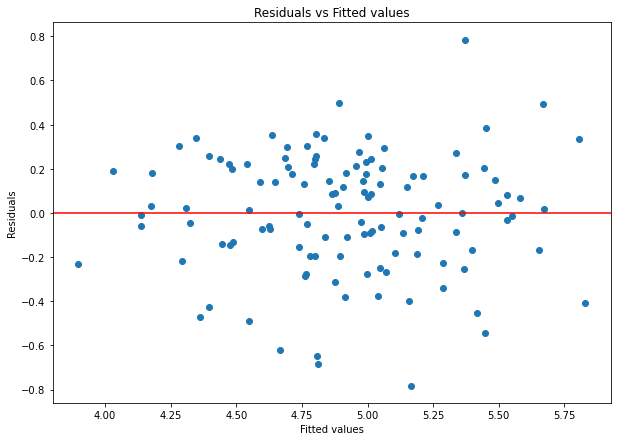

In [17]:
ypred = results.predict(x_lin)

plt.figure(figsize = (10,7))

plt.scatter(x = ypred, y = results.resid, )

plt.title("Residuals vs Fitted values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.axhline(0, c = "red")

plt.show()

### Breusch Pagan test

In [18]:
keys = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(keys,test)

[('Lagrange multiplier statistic', 21.67281630415122),
 ('p-value', 0.04135461329769424),
 ('f-value', 1.9653698138023015),
 ('f p-value', 0.03447284836352285)]

### White test

In [19]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
test = sms.het_white(results.resid, results.model.exog)

lzip(keys,test)

[('Lagrange Multiplier statistic:', 61.91805055903761),
 ("LM test's p-value:", 0.714820102164155),
 ('F-statistic:', 0.7724973595216384),
 ("F-test's p-value:", 0.8408674162805678)]

## Multicolinearity

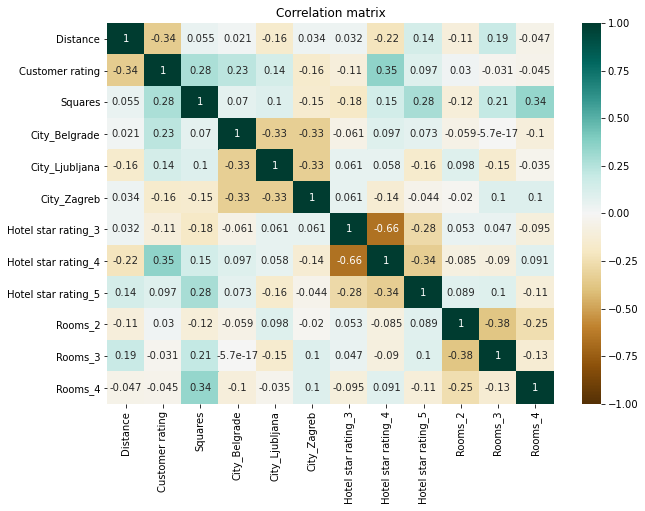

In [20]:
plt.figure(figsize = (10,7))


sns.heatmap(x_lin.drop(["const"], axis = 1).corr(), annot = True, vmax = 1, vmin = -1, cmap = "BrBG")

plt.title("Correlation matrix")

plt.show()

### VIF

In [21]:
vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index = x_lin.columns)[1:]

,vif
Distance,1.261040
Customer rating,2.103594
Squares,1.922740
City_Belgrade,1.708768
City_Ljubljana,1.858986
City_Zagreb,1.619136
Hotel star rating_3,5.942739
Hotel star rating_4,7.841235
Hotel star rating_5,4.733673
Rooms_2,1.378657


In [22]:
np.mean(vif[1:])

2.7967285901979584

## Normality of residuals

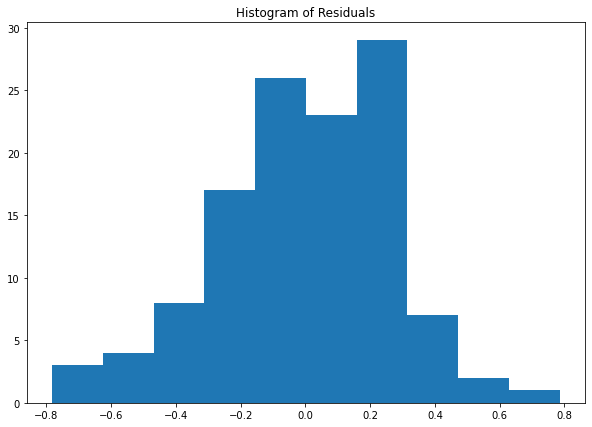

In [23]:
plt.figure(figsize = (10,7))

plt.hist(results.resid)

plt.title("Histogram of Residuals")

plt.show()

### Jarque-Bera test

In [24]:
keys = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test = sms.jarque_bera(results.resid)

lzip(keys, test)

[('Jarque-Bera test', 4.077402051527896),
 ('Chi-squared(2) p-value', 0.13019772457225576),
 ('Skewness', -0.41686520637925123),
 ('Kurtosis', 3.3469495772401463)]

## Conclusion

### Model is BLUE-Best Linear Unbiased Estimator. All of the assumptions are fulfilled, except BP test for heteroscedasticity. Despite BP test fail, White test showed high statistics and we can conclude that variance is constant. RvF plot also supports White test. VIF showed few variables with higher values but they are all <10, and the average VIF is not so high. R squared is solid and the model is statisticaly significant. Some of the variables are not statisticaly significant. Further if we want better model, we could try to drop outliers or drop some of the statisticaly insignificant variables or try other forms of model.

In [25]:
x_lin = sm.add_constant(x_lin)
model_loglin = sm.OLS(y_log, x_lin)
results = model_loglin.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(BAM)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.07e-22
Time:                        22:49:24   Log-Likelihood:                -12.059
No. Observations:                 120   AIC:                             50.12
Df Residuals:                     107   BIC:                             86.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9534    